<a href="https://colab.research.google.com/github/atiryunuskhan/EDA-theory/blob/main/Module6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Atir Yunus Khan (21BCE2707)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

In [4]:
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/horse.csv"
df = pd.read_csv(url)


In [5]:
data = df[['rectal_temp', 'pulse']].dropna()

In [6]:
# 1. Dissimilarity Matrix
# Compute the dissimilarity matrix using Euclidean distance
dissimilarity_matrix = pairwise_distances(data, metric='euclidean')
print("Dissimilarity Matrix:\n", dissimilarity_matrix)

Dissimilarity Matrix:
 [[ 0.         22.01113355 26.00076922 ...  6.08276253 34.05877273
  26.03247971]
 [22.01113355  0.         48.00843676 ... 16.09005904 12.3
  48.0416486 ]
 [26.00076922 48.00843676  0.         ... 32.00999844 60.02699393
   1.1       ]
 ...
 [ 6.08276253 16.09005904 32.00999844 ...  0.         28.01785145
  32.00140622]
 [34.05877273 12.3        60.02699393 ... 28.01785145  0.
  60.00408319]
 [26.03247971 48.0416486   1.1        ... 32.00140622 60.00408319
   0.        ]]


In [7]:

# 2. Multidimensional Scaling (MDS)
# Configure MDS with 2 components for visualization and store the stress function
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_transformed = mds.fit_transform(dissimilarity_matrix)
stress = mds.stress_
print(f"Stress Function Value: {stress}")

Stress Function Value: 434.31566272683693


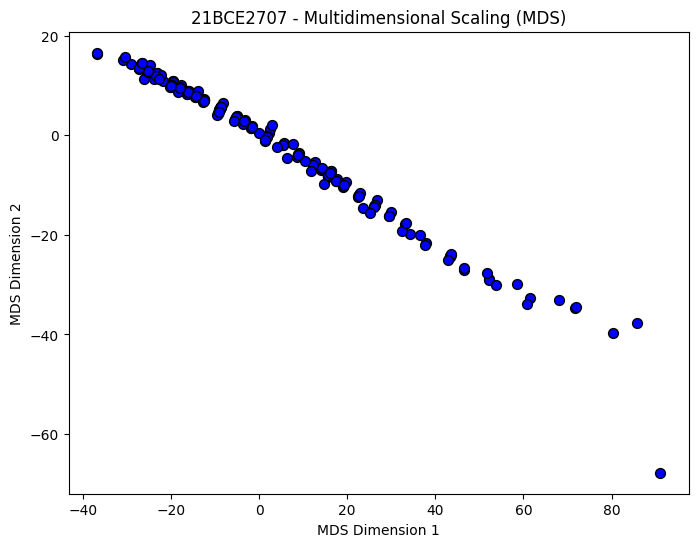

In [13]:
# Plot the MDS results
plt.figure(figsize=(8, 6))
plt.scatter(mds_transformed[:, 0], mds_transformed[:, 1], c='blue', edgecolor='k', s=50)
plt.title("21BCE2707 - Multidimensional Scaling (MDS)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()

In [9]:
# 3. Dimensional Reduction using PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

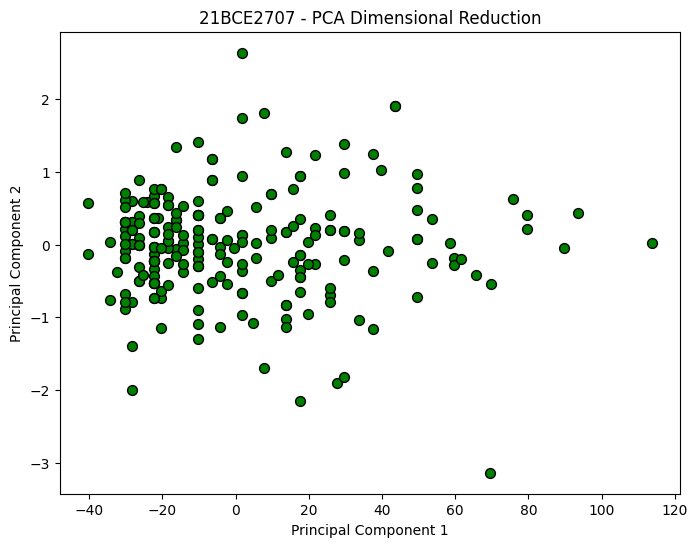

In [14]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c='green', edgecolor='k', s=50)
plt.title("21BCE2707 - PCA Dimensional Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [11]:
# 4. PCA Details - Eigenvalues and Explained Variance
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PCA Components:\n", pca.components_)

PCA Explained Variance Ratio: [9.99395514e-01 6.04485742e-04]
PCA Components:
 [[ 0.00551995  0.99998476]
 [ 0.99998476 -0.00551995]]


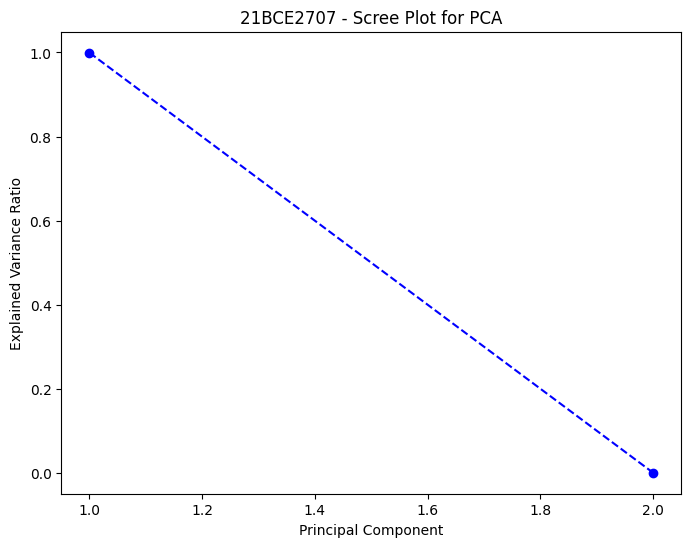

In [15]:
# Scree Plot for PCA to show the explained variance of each component
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
plt.figure(figsize=(8, 6))
plt.plot(components, explained_variance, marker='o', linestyle='--', color='b')
plt.title("21BCE2707 - Scree Plot for PCA")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()